In [1]:
import numpy as np
import matplotlib.pyplot as plt
# User defined libraries.
from BeamPropagator import BeamPropagator
import HelperFuns as hf

Below we are trying to replicate the code involved in the original BP code. It is replicating a 4F system. The focal length is 5615, and the hologram region is a length of 7812.5 centered in the region. The wavelength is 1 um, and all physical units are in microns.

In [2]:
#Define propagators for optical regions.
bp_free = BeamPropagator(wavelen=1)
bp_hol = BeamPropagator(wavelen=1, index=2)
#Define x-dimension sampling for both propgagators.
bp_free.set_x_array(x_length=4000, num_samples=4096)
bp_hol.set_x_array(x_length=4000, num_samples=4096)
#Enable absorbing boundary conditions for both propagators.
bp_free.set_abs_bcs(width_factor=128)
bp_hol.set_abs_bcs(width_factor=128)
#Define optical elements in system. Physical units in microns.
lens = hf.lens_phase_transform(x = bp_free.x_arr, focal_len=5615, wavelen=1.0)
# Define initial beam. Physical units in microns.
E0 = hf.gaussian_amp(A=3, x = bp_free.x_arr, waist=2.5, mu=-450)
bp_free.set_init_Efield(E0)

In [3]:
#Make storage objects for propagated fields and z-values.
z_vals = []
all_fields = []

In [4]:
# Define z-dimension sampling and propagate.
bp_free.set_z_array(z_length=5615, num_samples=500)
E_proped = bp_free.propagate()
# Add results to storage.
z_vals.extend(bp_free.z_arr)
all_fields.extend(bp_free.field_steps)

In [5]:
# Multiply by lens transform.
E1 = lens * E_proped
# Update z-dimension sampling.
bp_free.set_z_array(z_length=1708.75, num_samples=150)
# Update initial field.
bp_free.set_init_Efield(E1)
# Propagate.
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.z_arr + z_vals[-1])
all_fields.extend(bp_free.field_steps)

In [6]:
# Propagate through "hologram".
bp_hol.set_z_array(z_length=7812.5, num_samples=1000)
bp_hol.set_init_Efield(E_proped)
E_proped = bp_hol.propagate()
#Store results.
all_fields.extend(bp_hol.field_steps)
z_vals.extend(bp_hol.z_arr + z_vals[-1])

In [7]:
# Propagate through free space.
bp_free.set_z_array(z_length=1708.75, num_samples=150)
bp_free.set_init_Efield(E_proped)
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.z_arr + z_vals[-1])
all_fields.extend(bp_free.field_steps)

In [8]:
# Multiply by lens transform.
E1 = E_proped * lens
# Update propagation distance.
bp_free.set_z_array(z_length=5615, num_samples=500)
# Update initial field.
bp_free.set_init_Efield(E1)
# Propagate.
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.z_arr + z_vals[-1])
all_fields.extend(bp_free.field_steps)

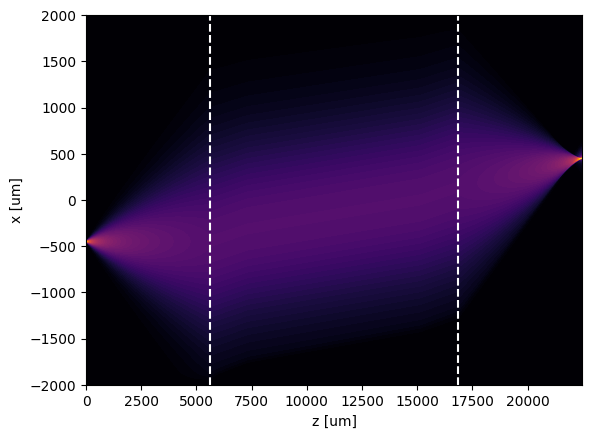

In [10]:
#Plotting time!
plt.contourf(z_vals, bp_free.x_arr, np.transpose(np.abs(all_fields))**(1/2),100,cmap='inferno')
plt.vlines([5615, 3*5615], -2000, 2000, colors='white',linestyles='dashed')
plt.ylabel("x [um]")
plt.xlabel("z [um]")
plt.show()